In [42]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Markdown

import scipy.stats

import warnings
warnings.filterwarnings("ignore")

In [43]:
verra_df = pd.read_csv('data/verra.csv')
verra_df.head()

,Issuance Date,Sustainable Development Goals,Vintage Start,Vintage End,ID,Name,Country/Area,Project Type,Methodology,Total Vintage Quantity,Quantity Issued,Serial Number,Additional Certifications,Retirement/Cancellation Date,Retirement Beneficiary,Retirement Reason,Retirement Details,is Toucan
0,2024-02-20,NaN,2022-12-01,2022-12-31,2309,Henrietta solar PV project,Mauritius,Energy industries (renewable/non-renewable sou...,ACM0002,2517,2517,16319-755958735-755961251-VCS-VCU-1491-VER-MU-...,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-02-20,NaN,2023-01-01,2023-05-31,2309,Henrietta solar PV project,Mauritius,Energy industries (renewable/non-renewable sou...,ACM0002,8360,8360,16320-755961252-755969611-VCS-VCU-1491-VER-MU-...,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-02-19,NaN,2013-01-01,2013-12-31,1122,April Salumei REDD Project,Papua New Guinea,Agriculture Forestry and Other Land Use,VM0007; VM0010,129972,10000,16301-755074262-755084261-VCS-VCU-352-VER-PG-1...,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-02-19,NaN,2022-01-01,2022-12-31,1812,VTRM Renewable Energy,Brazil,Energy industries (renewable/non-renewable sou...,ACM0002,409442,409442,16302-755084262-755493703-VCS-VCU-1491-VER-BR-...,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-02-19,NaN,2023-01-01,2023-08-31,1856,Bundled Wind Power Project by Sembcorp Green I...,India,Energy industries (renewable/non-renewable sou...,ACM0002,145996,145996,16303-755493704-755639699-VCS-VCU-997-VER-IN-1...,NaN,NaN,NaN,NaN,NaN,NaN


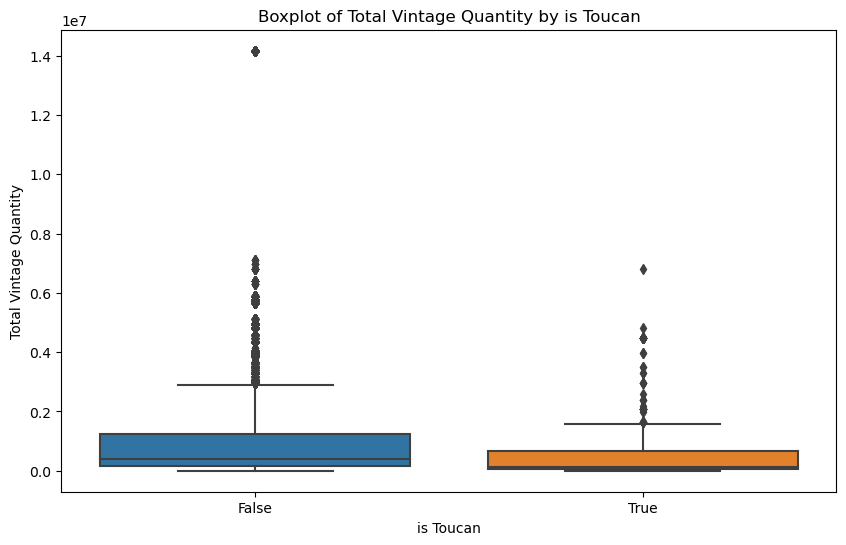

In [44]:
toucan_true = verra_df[verra_df['is Toucan'] == True]
toucan_false = verra_df[verra_df['is Toucan'] == False]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='is Toucan', y='Total Vintage Quantity', data=verra_df)
plt.title('Boxplot of Total Vintage Quantity by is Toucan')
plt.xlabel('is Toucan')
plt.ylabel('Total Vintage Quantity')
plt.show()

In [45]:
upper_whisker_toucan_true = toucan_true['Total Vintage Quantity'].quantile(0.75) + 1.5 * (toucan_true['Total Vintage Quantity'].quantile(0.75) - toucan_true['Total Vintage Quantity'].quantile(0.25))
upper_whisker_toucan_false = toucan_false['Total Vintage Quantity'].quantile(0.75) + 1.5 * (toucan_false['Total Vintage Quantity'].quantile(0.75) - toucan_false['Total Vintage Quantity'].quantile(0.25))

# Filter the original DataFrame to get data points above the upper whisker for both categories
top_25_percentile = verra_df[(verra_df['is Toucan'] == True) & (verra_df['Total Vintage Quantity'] > upper_whisker_toucan_true) | (verra_df['is Toucan'] == False) & (verra_df['Total Vintage Quantity'] > upper_whisker_toucan_false)]

# Display the new DataFrame
top_25_percentile.head()

,Issuance Date,Sustainable Development Goals,Vintage Start,Vintage End,ID,Name,Country/Area,Project Type,Methodology,Total Vintage Quantity,Quantity Issued,Serial Number,Additional Certifications,Retirement/Cancellation Date,Retirement Beneficiary,Retirement Reason,Retirement Details,is Toucan
7537,2023-02-24,NaN,2017-01-01,2020-12-31,1468,Northern Kenya Grassland Carbon Project,Kenya,Agriculture Forestry and Other Land Use,VM0032,3552595,25000,14776-627488491-627513490-VCS-VCU-352-VER-KE-1...,NaN,2023-03-06,British Airways Plc,Retirement for Person or Organization,Retirement on behalf of British Airways to com...,False
7915,2023-02-03,NaN,2020-01-01,2020-12-31,934,The Mai Ndombe REDD+ Project,"Congo, The Democratic Republic of The",Agriculture Forestry and Other Land Use,VM0009,6984597,3,14671-617000998-617001000-VCS-VCU-259-VER-CD-1...,CCB-Biodiversity Gold; CCB-Climate Gold,2023-05-16,nora,Environmental Benefit,Retired for noracare Cradle to Cradle certific...,False
7916,2023-02-03,NaN,2020-01-01,2020-12-31,934,The Mai Ndombe REDD+ Project,"Congo, The Democratic Republic of The",Agriculture Forestry and Other Land Use,VM0009,6984597,1058500,14671-617088498-618146997-VCS-VCU-259-VER-CD-1...,CCB-Biodiversity Gold; CCB-Climate Gold,2024-02-20,Eni Upstream,Environmental Benefit,Offsetting of the Upstream GHG emissions Scope...,False
7917,2023-02-03,NaN,2020-01-01,2020-12-31,934,The Mai Ndombe REDD+ Project,"Congo, The Democratic Republic of The",Agriculture Forestry and Other Land Use,VM0009,6984597,3,14671-617001001-617001003-VCS-VCU-259-VER-CD-1...,CCB-Biodiversity Gold; CCB-Climate Gold,2023-09-25,nora,Environmental Benefit,Retired for noracare Cradle to Cradle certific...,False
7920,2023-02-03,NaN,2019-01-01,2019-12-31,934,The Mai Ndombe REDD+ Project,"Congo, The Democratic Republic of The",Agriculture Forestry and Other Land Use,VM0009,6295037,100,14672-618796998-618797097-VCS-VCU-259-VER-CD-1...,CCB-Biodiversity Gold; CCB-Climate Gold,2023-12-12,Deacero,Environmental Benefit,These credits were used to offset emissions ge...,False


In [46]:
top_25_percentile = top_25_percentile.sort_values(by='Vintage Start')

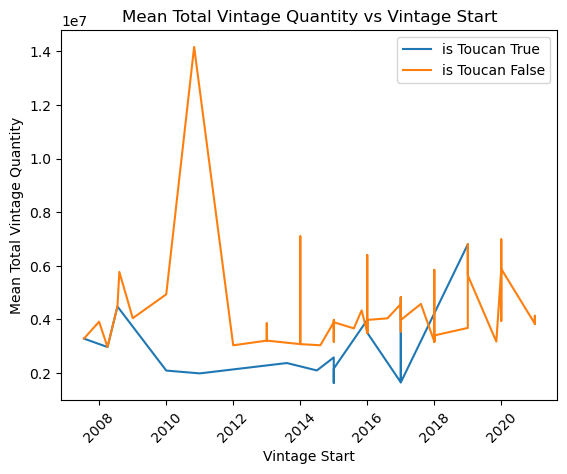

In [49]:
# Convert 'Vintage Start' to datetime
top_25_percentile['Vintage Start'] = pd.to_datetime(top_25_percentile['Vintage Start'])

# Group by 'Vintage Start' and 'is Toucan', and calculate the mean 'Total Vintage Quantity'

# Separate DataFrames for True and False 'is Toucan'
is_toucan_true = top_25_percentile[top_25_percentile['is Toucan'] == True]
is_toucan_false = top_25_percentile[top_25_percentile['is Toucan'] == False]

# Plot 'Vintage Start' against 'Total Vintage Quantity' for True 'is Toucan'
plt.plot(is_toucan_true['Vintage Start'], is_toucan_true['Total Vintage Quantity'], label='is Toucan True')

# Plot 'Vintage Start' against 'Total Vintage Quantity' for False 'is Toucan'
plt.plot(is_toucan_false['Vintage Start'], is_toucan_false['Total Vintage Quantity'], label='is Toucan False')

# Set labels and title
plt.xlabel('Vintage Start')
plt.ylabel('Mean Total Vintage Quantity')
plt.title('Mean Total Vintage Quantity vs Vintage Start')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show plot
plt.show()

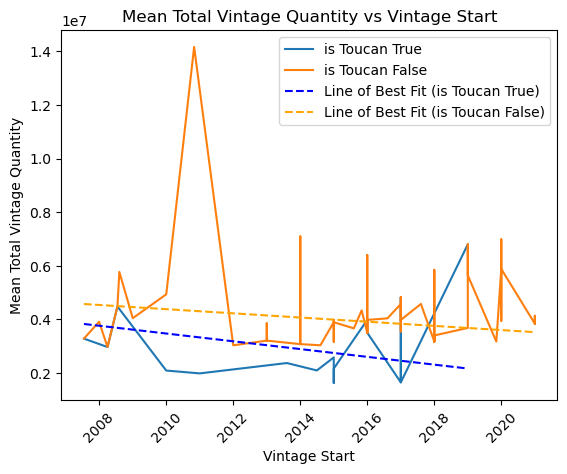

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Convert 'Vintage Start' to datetime
top_25_percentile['Vintage Start'] = pd.to_datetime(top_25_percentile['Vintage Start'])

# Group by 'Vintage Start' and 'is Toucan', and calculate the mean 'Total Vintage Quantity'

# Separate DataFrames for True and False 'is Toucan'
is_toucan_true = top_25_percentile[top_25_percentile['is Toucan'] == True]
is_toucan_false = top_25_percentile[top_25_percentile['is Toucan'] == False]

# Linear regression for True 'is Toucan'
true_x = is_toucan_true['Vintage Start'].values.astype('datetime64[ns]').astype(np.int64).reshape(-1, 1)
true_y = is_toucan_true['Total Vintage Quantity'].values.reshape(-1, 1)
true_model = LinearRegression().fit(true_x, true_y)
true_y_pred = true_model.predict(true_x)

# Linear regression for False 'is Toucan'
false_x = is_toucan_false['Vintage Start'].values.astype('datetime64[ns]').astype(np.int64).reshape(-1, 1)
false_y = is_toucan_false['Total Vintage Quantity'].values.reshape(-1, 1)
false_model = LinearRegression().fit(false_x, false_y)
false_y_pred = false_model.predict(false_x)

# Plot 'Vintage Start' against 'Total Vintage Quantity' for True 'is Toucan'
plt.plot(is_toucan_true['Vintage Start'], is_toucan_true['Total Vintage Quantity'], label='is Toucan True')

# Plot 'Vintage Start' against 'Total Vintage Quantity' for False 'is Toucan'
plt.plot(is_toucan_false['Vintage Start'], is_toucan_false['Total Vintage Quantity'], label='is Toucan False')

# Plot lines of best fit
plt.plot(is_toucan_true['Vintage Start'], true_y_pred, color='blue', linestyle='--', label='Line of Best Fit (is Toucan True)')
plt.plot(is_toucan_false['Vintage Start'], false_y_pred, color='orange', linestyle='--', label='Line of Best Fit (is Toucan False)')

# Set labels and title
plt.xlabel('Vintage Start')
plt.ylabel('Mean Total Vintage Quantity')
plt.title('Mean Total Vintage Quantity vs Vintage Start')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show plot
plt.show()